In [23]:
%matplotlib inline

In [24]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import numpy as np

import matplotlib.pyplot as plt

In [25]:
#SAMPLE IMAGE
image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

In [26]:
#plt.imshow(image_gray)

In [27]:
# PVN IMAGE
from PIL import Image
import numpy
img_pvn = Image.open("PVN.png")


In [28]:
# PVN IMAGE RGBA -> RGB
img_pvn.load()
background = Image.new("RGB", img_pvn.size, (255, 255, 255))
background.paste(img_pvn, mask = img_pvn.split()[3])
background.save("img_pvn_final.jpg", "JPEG", quality=100)

rgb_image = Image.open("img_pvn_final.jpg")

In [30]:
# PVN IMAGE
np_img_pvn = numpy.array(rgb_image)
image_gray_pvn = rgb2gray(np_img_pvn)

blobs_pvn = blob_log(image_gray_pvn, max_sigma=30, num_sigma=10, threshold=.1)

In [31]:
#plt.imshow(image_gray_pvn)

In [32]:
# Check if RGBA
#def has_transparency(img):
 #   if img.mode == "P":
  #      transparent = img.info.get("transparency", -1)
  #      for _, index in img.getcolors():
   #         if index == transparent:
   #             return True
    #elif img.mode == "RGBA":
    #    extrema = img.getextrema()
    #    if extrema[3][0] < 255:
     #       return True

    #return False

In [33]:
#has_transparency(img_pvn)

False

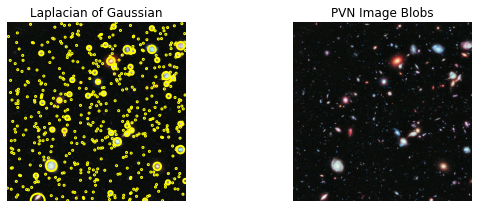

In [34]:
#SAMPLE IMAGE

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_pvn[:, 2] = blobs_pvn[:, 2] * sqrt(2)

#blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
#blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
#blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_pvn]
colors = ['yellow', 'yellow']
titles = ['Laplacian of Gaussian', 'PVN Image Blobs']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 2, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()